# Brain binary case

## Part 3 - discovering brain problem behaviour

By contrast to the well-known karate club problem, the brain problem needs to be scrutinized for maximum modularity scores results, which aren't fully clear, as we do not know the ground truth.

Let's start with louvain method to see what modularity scores to expect to refer to it later.

Let's start with a very wide range of gammas.

### Experiment scope:
- matrix res. gamma in wide, wide range [0.01, 1.8], 60 values
- for each value run 10 times

In [1]:
GAMMA_LOWER_BOUND = 0.01
GAMMA_UPPER_BOUND = 1.8

In [10]:
import pandas as pd
from paths import BRAIN_PR_NAME, csv_path


ID = 1

l = pd.read_csv(
    csv_path(id=ID, problem_name=BRAIN_PR_NAME, solver_name="louvain")
)

In [16]:
K = 2

n_all = l.shape[0]

n_groups = l.groupby(l.matrix_res).ngroups
n_in_group = l.groupby(l.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 60 resolution param values, each value run 10 times.


In [17]:
l.k.value_counts()

k
4.0    195
6.0    140
7.0    112
1.0     39
3.0     38
5.0     33
8.0     29
2.0     14
Name: count, dtype: int64

In [18]:
# Only res. samples with 2 communities
l = l[l["k"] == K]

scores = l.mod_score
matrix_res = l.matrix_res

l_by_res = l.groupby(l.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
l_by_res = l_by_res.round(score_prec)
l_by_res.index = l_by_res.index.to_series().round(idx_prec)

print(f"{l.shape[0]} results entries for {K} communities")
print(f"{l_by_res.shape[0]} different resolution value params for {K} communities")

14 results entries for 2 communities
3 different resolution value params for 2 communities


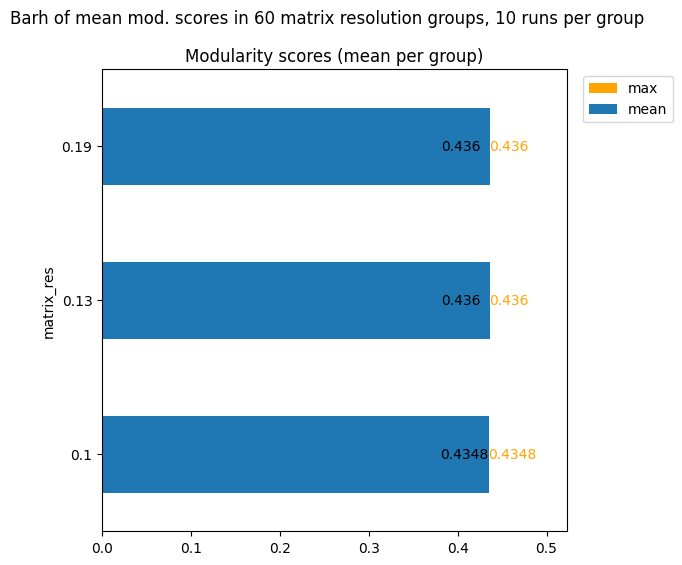

In [19]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle("Barh of mean mod. scores in "+f"{n_groups} matrix resolution groups, "+f"{n_in_group} runs per group")

l_max_barh = l_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

l_mean_barh = l_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(ax.containers[-1], label_type="edge", position=(-35,0), color="black")

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(
    bbox_to_anchor=(1.02, 1), loc=2
);

- As can be seen, louvain outputs exactly 2 communities only for gamma in range [0.1, 0.19].
- We shall set the referential mod. score value for the brain problem of 2 communities to 0.436.

## Advantage

Let's do preliminary screening to get to know the proper gamma range for Advantage and the problem.

### Experiment scope:
- matrix res. gamma in wide range [0.4, 1.8], 15 values
- for each value run twice

In [20]:
GAMMA_LOWER_BOUND = 0.4
GAMMA_UPPER_BOUND = 1.8

In [21]:
import pandas as pd
from paths import csv_path, BRAIN_PR_NAME


# Id for data storage purposes
ID = 7

a = pd.read_csv(
    csv_path(id=ID, problem_name=BRAIN_PR_NAME, solver_name="adv")
)

In [22]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 15 resolution param values, each value run 2 times.


In [23]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values 
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
30 results entries
15 resolution value params


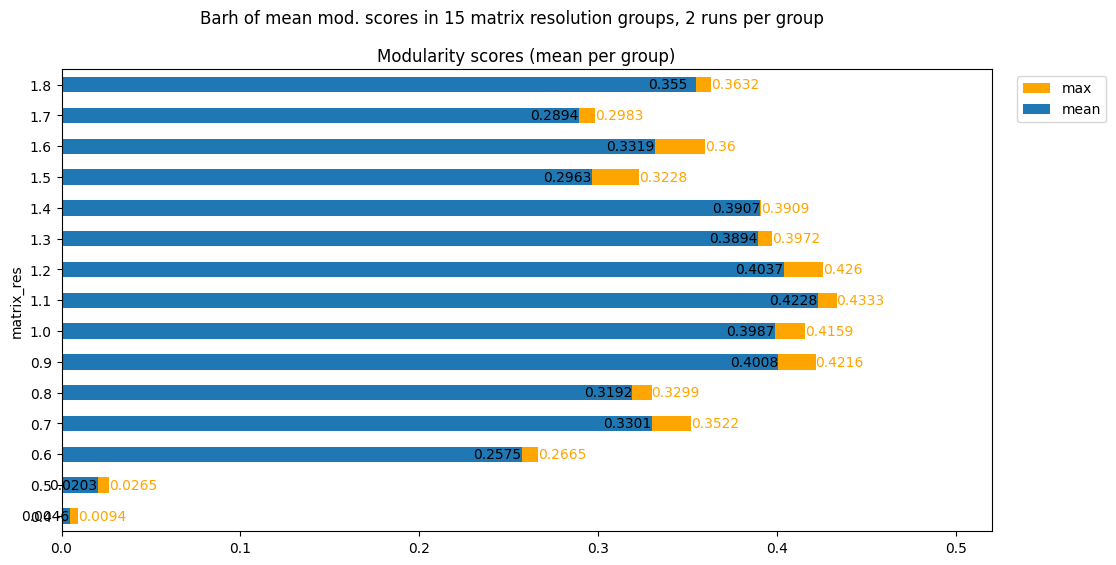

In [24]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Barh of mean mod. scores in "+f"{n_groups} matrix resolution groups, "+f"{n_in_group} runs per group")

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(ax.containers[-1], label_type="edge", position=(-35,0), color="black")

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(
    bbox_to_anchor=(1.02, 1), loc=2
);

- With as little as 2 runs per gamma value (Advantage had less "opportunities" to obtain the best results), sensible results where obtained within range of [0.9, 1.4] with mean mod. score >= 0.39.
- These results are not binding due to fact that each problem instance (with a given gamma) was run only twice, so it is not safe to state whether Advantage produces for the brain problem binary case good or bad results. That will be further examined.
- However, the solid conclusion is that Advantage and louvain have different gamma input ranges to deliver binary case solution.

### Advantage - narrowing down the gamma range
### Experiment scope:
- matrix res. gamma in range [0.8, 1.4], 15 values
- for each value run 5 times

In [32]:
GAMMA_LOWER_BOUND = 0.8
GAMMA_UPPER_BOUND = 1.4

In [33]:
import pandas as pd
from paths import csv_path, BRAIN_PR_NAME


# Id for data storage purposes
ID = 6

a = pd.read_csv(
    csv_path(id=ID, problem_name=BRAIN_PR_NAME, solver_name="adv")
)

In [34]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 15 resolution param values, each value run 5 times.


In [35]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values 
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
75 results entries
15 resolution value params


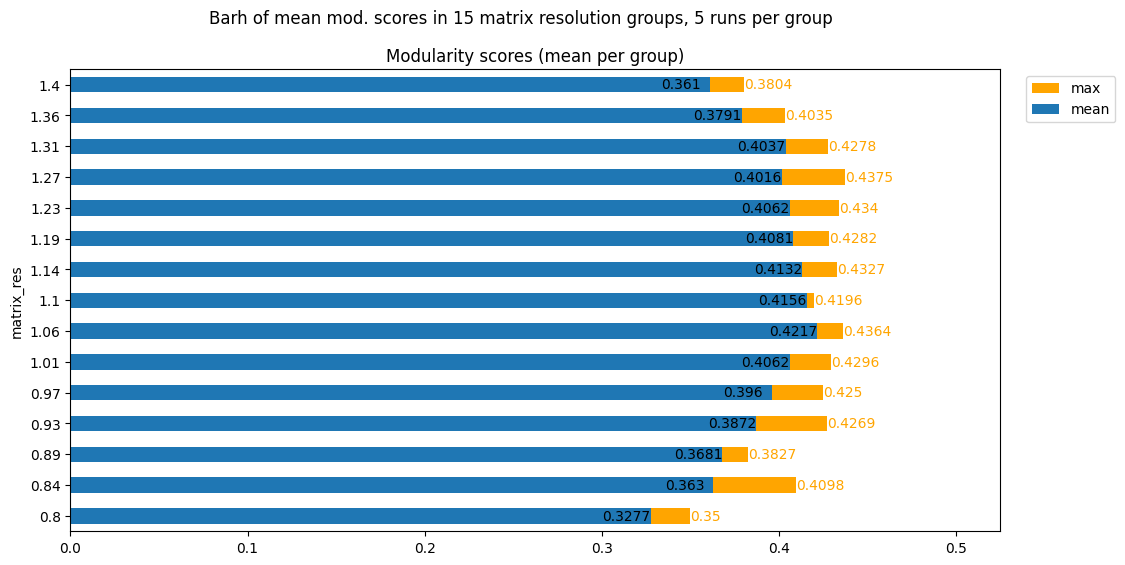

In [36]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Barh of mean mod. scores in "+f"{n_groups} matrix resolution groups, "+f"{n_in_group} runs per group")

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(ax.containers[-1], label_type="edge", position=(-35,0), color="black")

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(
    bbox_to_anchor=(1.02, 1), loc=2
);

- The best results were obtained for gamma 1.1 with mean mod. score 0.4217 -> gamma = 1.1 +/- 0.04 seems to be the best hyperparam, however that is to be verified further.

index min: 0.8
index max: 1.4
mean mod. score min: 0.3277
mean mod. score max: 0.4217


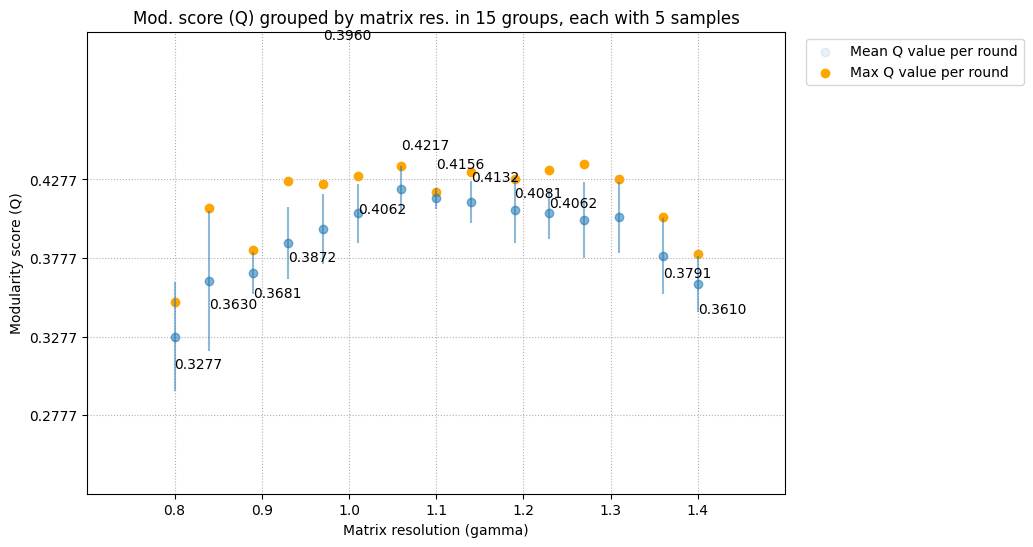

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


a_x_min = a_by_res.index.min()
a_x_max = a_by_res.index.max()
a_score_mean_min = a_by_res.mod_score["mean"].min()
a_score_mean_max = a_by_res.mod_score["mean"].max()

print(f"index min: {a_x_min}")
print(f"index max: {a_x_max}")
print(f"mean mod. score min: {a_score_mean_min}")
print(f"mean mod. score max: {a_score_mean_max}")


plt.rcParams["figure.figsize"] = (9, 6)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, axes = plt.subplots()

axes.xaxis.set_major_locator(x_major_ticker)
axes.xaxis.set_minor_locator(x_minor_ticker)

axes.set_title(
    f"Mod. score (Q) grouped by matrix res. in {n_groups} groups,"
    + f" each with {n_in_group} samples"
)
axes.set_xlabel("Matrix resolution (gamma)")
axes.set_ylabel("Modularity score (Q)")

axes.grid(which="major", linestyle=":")

x_margin = 0.1
axes.set_xlim(a_x_min - x_margin, a_x_max + x_margin)
axes.set_xticks(np.arange(GAMMA_LOWER_BOUND, GAMMA_UPPER_BOUND + x_margin / 2, x_margin))
y_margin = 0.1
axes.set_ylim(a_score_mean_min - y_margin, a_score_mean_max + y_margin)
axes.set_yticks(
    np.arange(
        a_score_mean_min - y_margin / 2,
        a_score_mean_max + y_margin / 2,
        step=y_margin / 2,
    )
)

axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    label="Mean Q value per round",
    alpha=0.1,
)
axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["max"],
    c="orange",
    label="Max Q value per round",
)
axes.errorbar(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    yerr=a_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)

x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(
        zip(a_by_res.index, a_by_res.mod_score["mean"])
    )
]

d = {k: v for k, v in enumerate(zip(a_by_res.index, a_by_res.mod_score["mean"]))}
d_sorted = dict(sorted(d.items(), key=lambda item: item[1][1]))
y_offsets = [0.1 if x > 0.41 else -0.03 for x in a_by_res.mod_score["mean"]]

off = 0.01
for i, t in enumerate(list(d_sorted.items())):
    _, (k, v) = t
    axes.annotate(text=f"{v:.4f}", xy=(k + x_offsets[i], v+y_offsets[i]+off), color="black")
    # off += 0.005
    off *= 1.13

axes.legend(bbox_to_anchor=(1.02, 1), loc=2);